# Healthcare: Predicting Heart Attack

## Description:
### Cardiovascular disease is one of the top contributors to mortality in the world. Millions of dollars were spent on medical treatment included medications, surgical intervention, and so forth. Instead of spending humongous amount of money in treatment, preventive measures can significantly impact population health in positive way. People can benefit from early diagnosis before heart attack and gives them the opportunity to take preventive actions. 

## Project Objective:
### To predict the outcome, if there is a high or less chance of having heart attack. The target feature or y-variable is "output", where 0= less chance of heart attack 1= more chance of heart attack.  

## Process:
### This interesting project will start of with basic descriptive analysis, followed by data visualization along with exploratory data analysis, preparing the data, splitting train and test data, and fit into the model. Finally, the model's performance will be evaluated by classification report and confusion matrix. 

## Potential Impact:
### Healthier population, less money spent on healthcare, reduce mortality rate due to cardiovascular disease. 

# Dataset Description:


## Age : Age of the patient

## Sex : Sex of the patient

## exang: exercise induced angina (1 = yes; 0 = no)

## ca: number of major vessels (0-3)

## cp : Chest Pain type chest pain type

* Value 1: typical angina 
* Value 2: atypical angina 
* Value 3: non-anginal pain 
* Value 4: asymptomatic

## trtbps : resting blood pressure (in mm Hg)

## chol : cholestoral in mg/dl fetched via BMI sensor

## fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

## rest_ecg : resting electrocardiographic results

* Value 0: normal 
* Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) 
* Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria thalach : maximum heart rate achieved

## target : 0= less chance of heart attack 1= more chance of heart attack

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("../input/heart-attack-analysis-prediction-dataset/heart.csv")

In [3]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Checking for duplicates

In [4]:
duplicate_rows = data[data.duplicated()]
print("Number of duplicate rows: ", duplicate_rows.shape)

Number of duplicate rows:  (1, 14)


In [5]:
data = data.drop_duplicates()

In [6]:
duplicate_rows = data[data.duplicated()]
print("Number of duplicate rows: ", duplicate_rows.shape)

Number of duplicate rows:  (0, 14)


### Noted that the data types are integers and float with no null values

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trtbps    302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalachh  302 non-null    int64  
 8   exng      302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slp       302 non-null    int64  
 11  caa       302 non-null    int64  
 12  thall     302 non-null    int64  
 13  output    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [8]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

### Basic descriptive analysis

In [9]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trtbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalachh,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exng,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


### Exploratory Data Analysis

### The target feature "output" has sorta balanced dataset

In [10]:
data["output"].value_counts(normalize=True)*100

1    54.304636
0    45.695364
Name: output, dtype: float64

<AxesSubplot:xlabel='output', ylabel='count'>

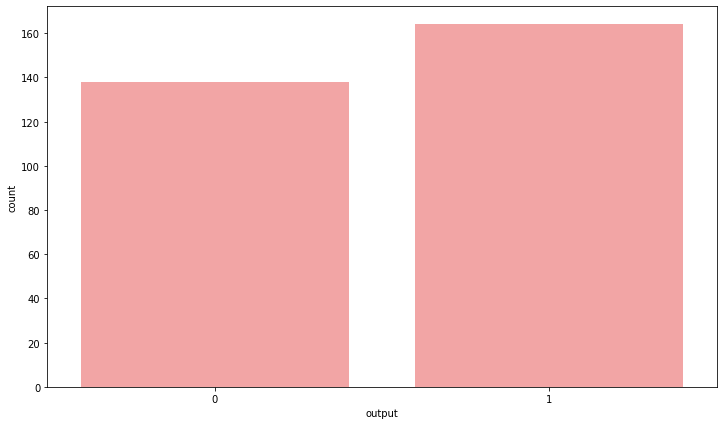

In [11]:
plt.figure(figsize=(12,7))
sns.countplot(x=data["output"], color="red", alpha=0.4)

In [12]:
print("The min value for age is: ", data["age"].min())
print("The mean value for age is: ", data["age"].mean())
print("The max value for age is: ", data["age"].max())

The min value for age is:  29
The mean value for age is:  54.420529801324506
The max value for age is:  77


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

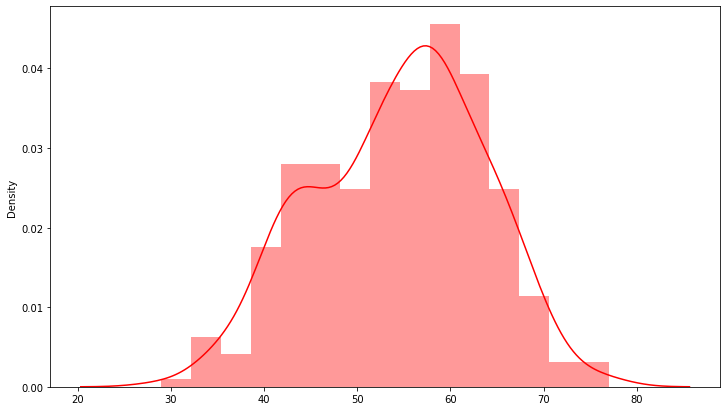

In [13]:
plt.figure(figsize=(12,7))
sns.distplot(x=data["age"], bins=15, color="red")

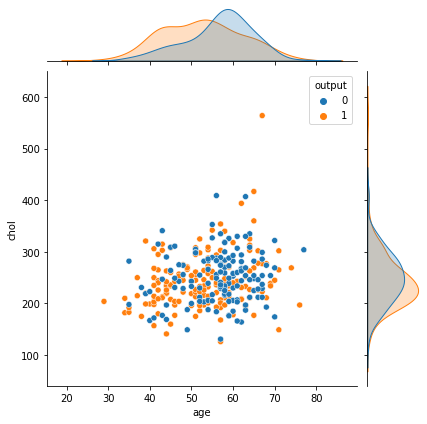

In [14]:
sns.jointplot(x="age", y="chol", data=data, hue="output")

### Noted outliers in choleterol feature. Will just drop these extreme numbers. 

In [15]:
data["chol"].max()

564

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

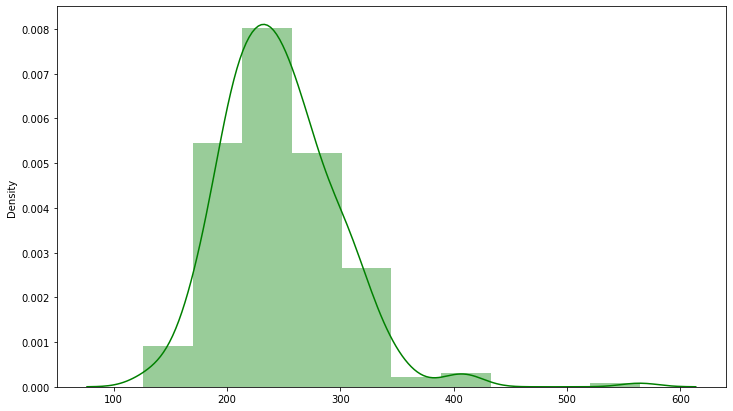

In [16]:
plt.figure(figsize=(12,7))
sns.distplot(x=data["chol"], bins=10, color="green")

### Removing outlier

In [17]:
data = data[data["chol"] < 380]

In [18]:
data["chol"].max()

360

### The gender proportion is imbalanced with male accounts for ~69% and female ~31%.

In [19]:
data["sex"].value_counts(normalize=True)*100

1    69.360269
0    30.639731
Name: sex, dtype: float64

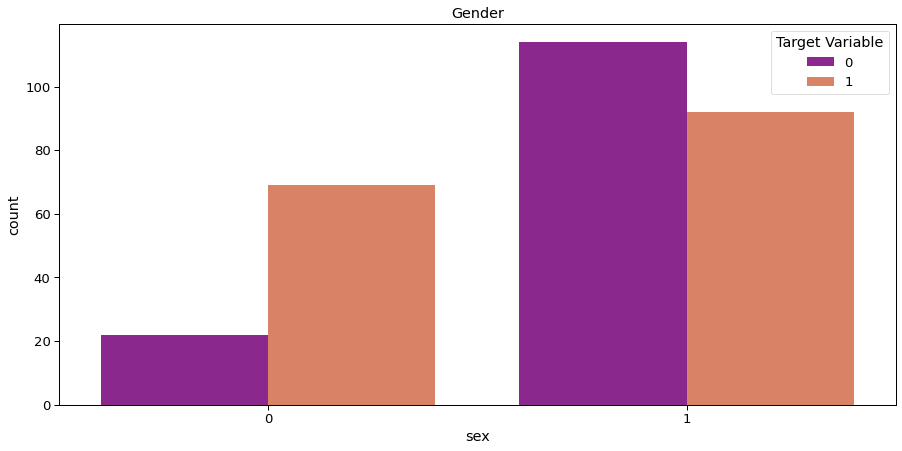

In [20]:
plt.figure(figsize=(15,7))
sns.set_context("paper", font_scale=1.5)
sns.countplot(x="sex", palette="plasma", data=data, hue="output")
plt.title("Gender")
plt.legend(title="Target Variable")

In [21]:
gender_gb = data.groupby("output")["sex"]
gender_gb.value_counts()

output  sex
0       1      114
        0       22
1       1       92
        0       69
Name: sex, dtype: int64

# Fun Fact:
### Given the dataset, the probability of a picking a female patient with having higher chance of heart attack is 23%

### Given the dataset, the probability of a picking a male patient with having higher chance of heart attack is 31%

In [22]:
prob_female_total = 69/len(data["sex"])*100
prob_female_total

23.232323232323232

In [23]:
prob_male_total = 92/len(data["sex"])*100
prob_male_total

30.976430976430976

### Noted in general, males have higher count than females across all types of chest pain, as shown in the graph below. This is because of the gender proportion in the dataset. 

Text(0.5, 0, 'Chest Pain: 1 typical angina, 2 atypical angina, 3 non-anginal pain, 4 asymptomatic')

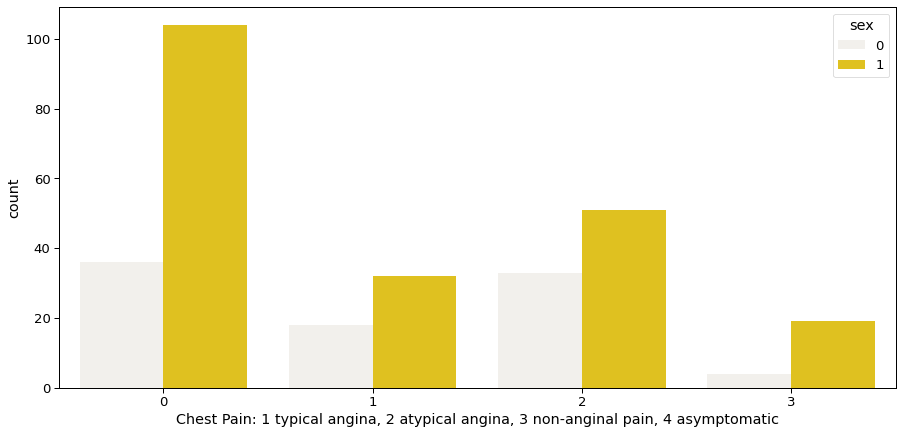

In [24]:
plt.figure(figsize=(15,7))
sns.set_context("paper", font_scale=1.5)
sns.countplot(x="cp", color="gold", data=data, hue="sex")
plt.xlabel("Chest Pain: 1 typical angina, 2 atypical angina, 3 non-anginal pain, 4 asymptomatic")

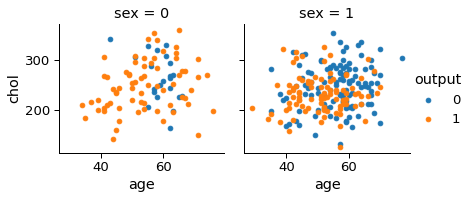

In [25]:
g = sns.FacetGrid(data, col="sex", hue="output")
g.map(plt.scatter, "age", "chol").add_legend()

### Drilling down into number of males and females having higher chance of heart attack

In [26]:
prob_female = 69/(69+22)*100
prob_male = 93/(114+93)*100
print("Given the female population in the dataset, the probability of a female having higher chance of heart attack is: {:.2f}%".format(prob_female))
print("\n")
print("Given the male population in the dataset, the probability of a male having higher chance of heart attack is: {:.2f}%".format(prob_male))

Given the female population in the dataset, the probability of a female having higher chance of heart attack is: 75.82%


Given the male population in the dataset, the probability of a male having higher chance of heart attack is: 44.93%


Text(0.5, 0, 'Chest Pain: 0 typical angina, 1 atypical angina, 2 non-anginal pain, 3 asymptomatic')

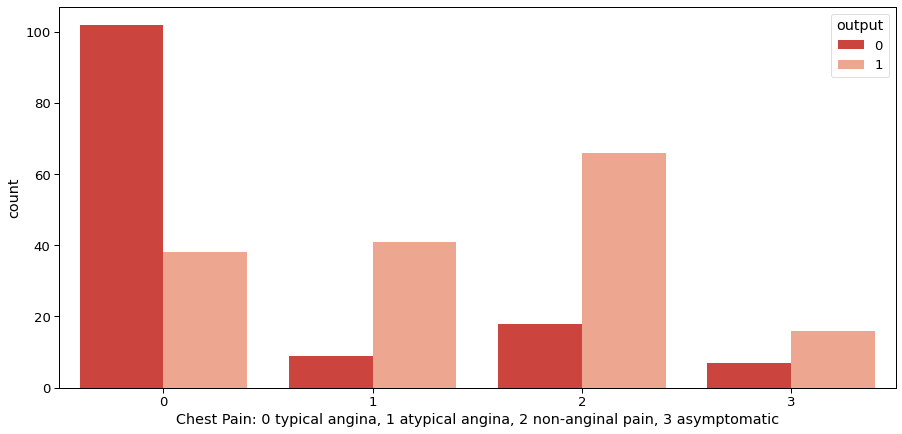

In [27]:
plt.figure(figsize=(15,7))
sns.set_context("paper", font_scale=1.5)
sns.countplot(x="cp", palette="Reds_r", data=data, hue="output")
plt.xlabel("Chest Pain: 0 typical angina, 1 atypical angina, 2 non-anginal pain, 3 asymptomatic")

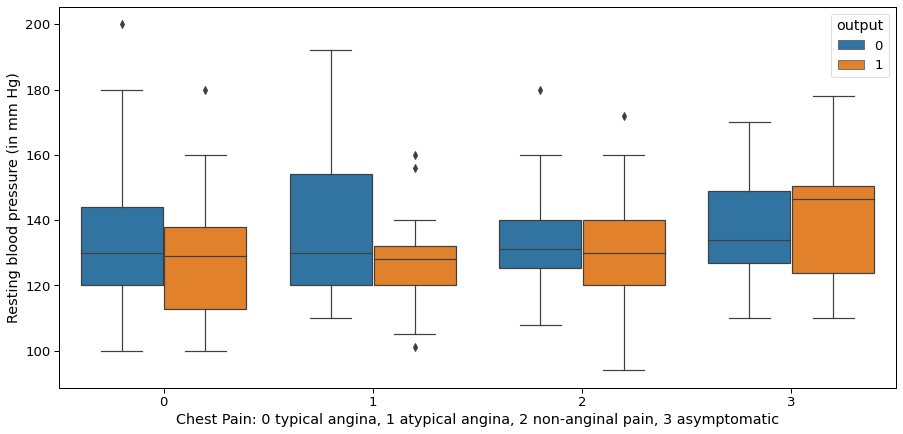

In [28]:
plt.figure(figsize=(15,7))
sns.boxplot(x="cp", y="trtbps", data=data, hue="output")
plt.xlabel("Chest Pain: 0 typical angina, 1 atypical angina, 2 non-anginal pain, 3 asymptomatic")
plt.ylabel("Resting blood pressure (in mm Hg)")
sns.set_context("paper", font_scale=1.5)

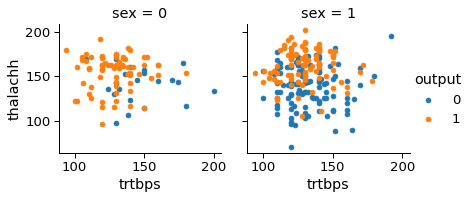

In [30]:
g = sns.FacetGrid(data, col="sex", hue="output")
g.map(plt.scatter, "trtbps", "thalachh").add_legend()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

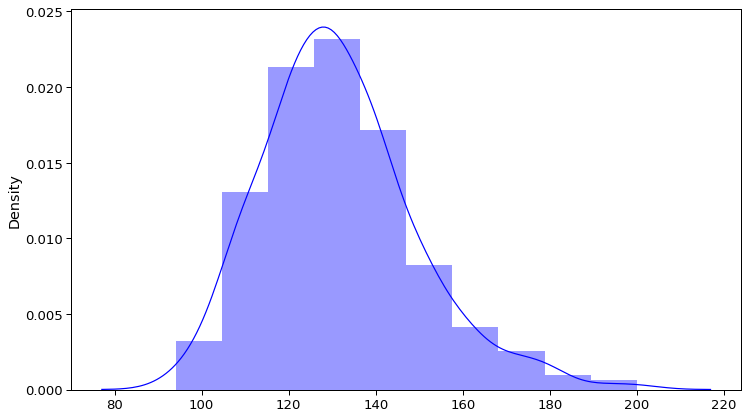

In [31]:
plt.figure(figsize=(12,7))
sns.distplot(x=data["trtbps"], bins=10, color="blue")

In [32]:
data = data[data["trtbps"] < 180]

In [33]:
data["trtbps"].max()

178

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

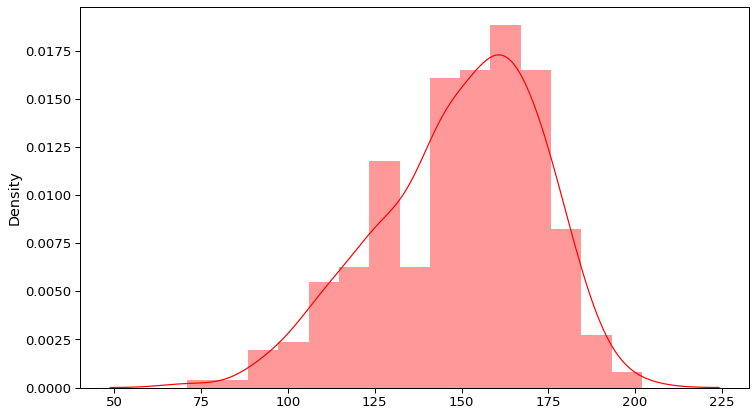

In [34]:
plt.figure(figsize=(12,7))
sns.distplot(x=data["thalachh"], bins=15, color="red")

In [35]:
data = data[data["thalachh"] > 100]

In [36]:
data["thalachh"].min()

103

In [37]:
data.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [38]:
data["fbs"].value_counts(normalize=True)*100

0    85.915493
1    14.084507
Name: fbs, dtype: float64

<AxesSubplot:xlabel='fbs', ylabel='count'>

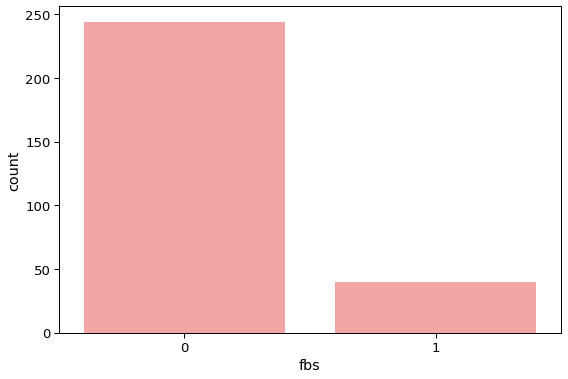

In [39]:
plt.figure(figsize=(9,6))
sns.countplot(x=data["fbs"], color="red", alpha=0.4)

<AxesSubplot:xlabel='exng', ylabel='thalachh'>

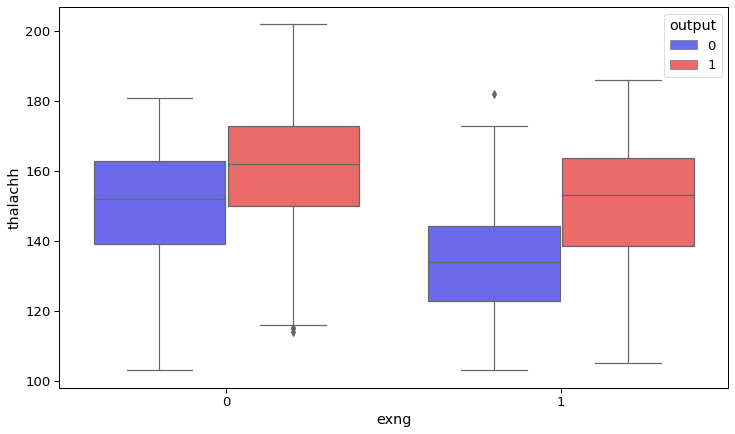

In [40]:
plt.figure(figsize=(12,7))
sns.boxplot(x="exng", y="thalachh", data=data, hue="output", palette="seismic")

In [41]:
data.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

<AxesSubplot:xlabel='slp', ylabel='oldpeak'>

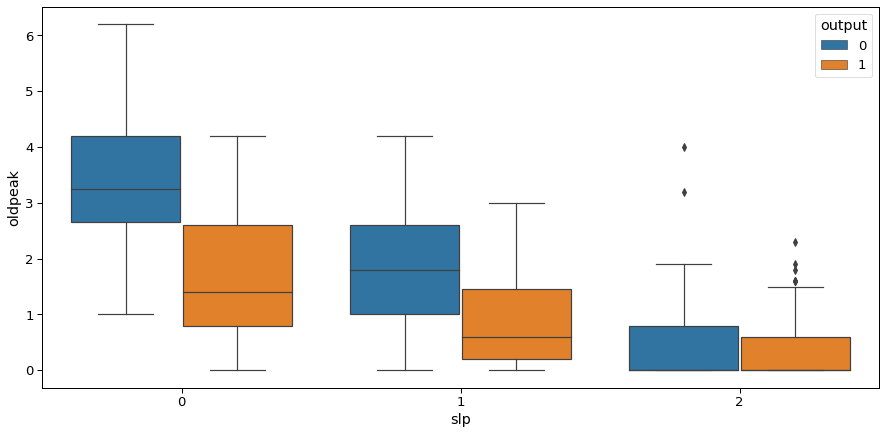

In [42]:
plt.figure(figsize=(15,7))
sns.boxplot(x="slp", y="oldpeak", data=data, hue="output")

<AxesSubplot:xlabel='slp', ylabel='oldpeak'>

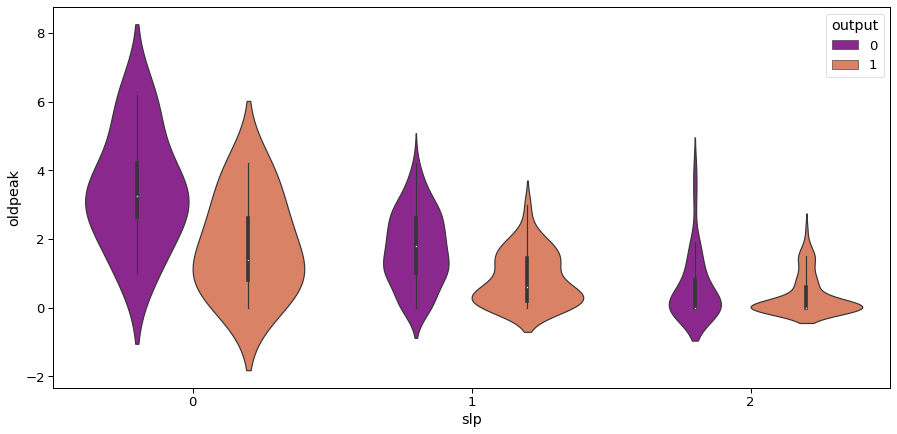

In [43]:
plt.figure(figsize=(15,7))
sns.violinplot(x="slp", y="oldpeak", data=data, hue="output", palette="plasma")

In [44]:
data["caa"].value_counts(normalize=True)*100

0    59.154930
1    21.126761
2    11.619718
3     6.690141
4     1.408451
Name: caa, dtype: float64

In [45]:
data["restecg"].value_counts(normalize=True)*100

1    50.704225
0    48.239437
2     1.056338
Name: restecg, dtype: float64

In [46]:
data["restecg"].value_counts()

1    144
0    137
2      3
Name: restecg, dtype: int64

In [47]:
ekg_normal = len(data[data["restecg"] == 0])/len(data["restecg"])*100
ekg_normal

48.23943661971831

In [48]:
ekg1 = len(data[data["restecg"] == 1])/len(data["restecg"])*100
ekg2 = len(data[data["restecg"] == 2])/len(data["restecg"])*100
ekg_normal = len(data[data["restecg"] == 0])/len(data["restecg"])*100

print("Abnormal EKG: {:.2f}".format(ekg1))
print("\n")
print("Hypertrophy by Estes: {:.2f}".format(ekg2))
print("\n")
print("Normal EKG: {:.2f}".format(ekg_normal))


Abnormal EKG: 50.70


Hypertrophy by Estes: 1.06


Normal EKG: 48.24


<AxesSubplot:xlabel='output', ylabel='count'>

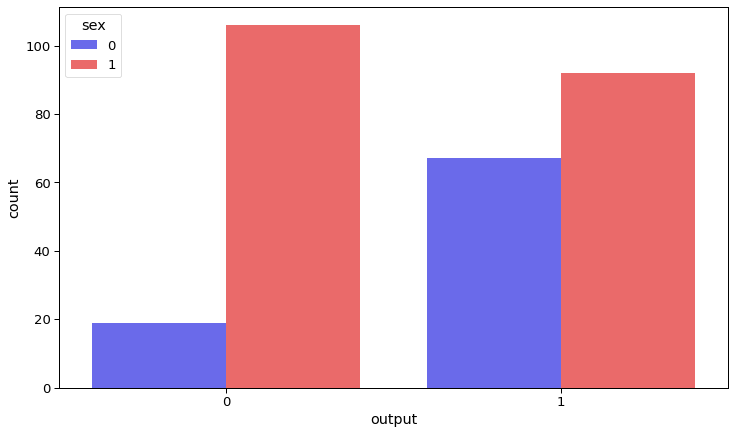

In [49]:
plt.figure(figsize=(12,7))
sns.countplot(x="output", data=data, hue="sex", palette="seismic")

In [50]:
data.corr()["output"].sort_values(ascending=False)

output      1.000000
cp          0.426751
thalachh    0.412785
slp         0.322883
restecg     0.150357
fbs        -0.028433
chol       -0.098477
trtbps     -0.113897
age        -0.220582
sex        -0.291033
thall      -0.338490
caa        -0.397661
oldpeak    -0.417108
exng       -0.432780
Name: output, dtype: float64

### The data correlation in the heatmap below shows us that cp, thalachh, and s/p have the highest correlation with output, our target variable. 

<AxesSubplot:>

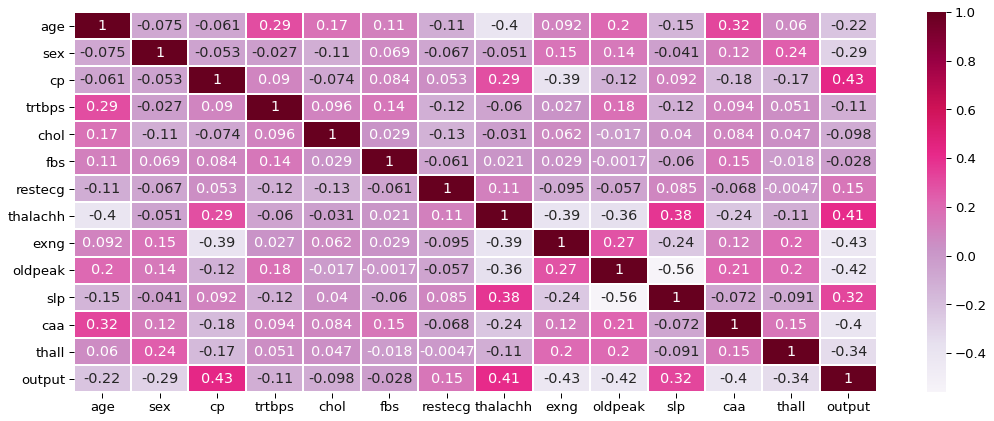

In [51]:
plt.figure(figsize=(18,7))
sns.heatmap(data.corr(method="pearson"), cmap="PuRd", annot=True, lw=0.1)

### A quick glance using the graph below, age 50 with non-anginal chest type has the highest risk of having a heart attack.

<AxesSubplot:xlabel='age', ylabel='cp'>

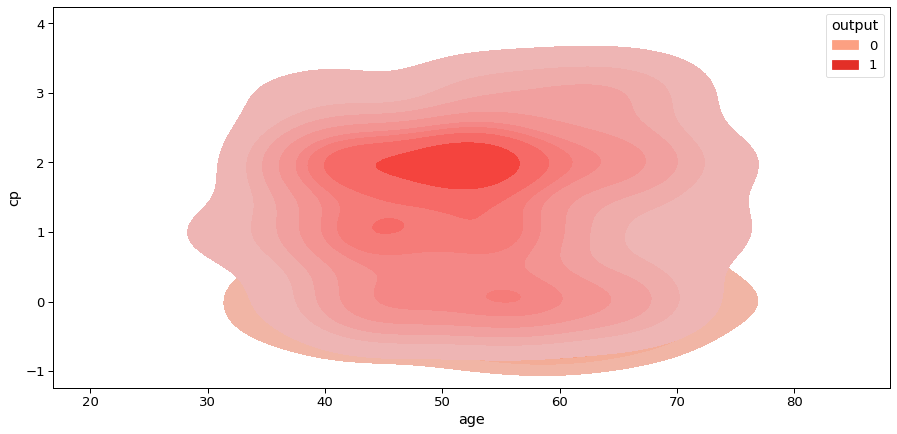

In [52]:
plt.figure(figsize=(15,7))
sns.kdeplot(x="age", y="cp", data=data, hue="output", fill=True, palette="Reds")

In [53]:
data.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [54]:
data.skew(axis=0, skipna=True)

age        -0.133548
sex        -0.862858
cp          0.469491
trtbps      0.393497
chol        0.216392
fbs         2.075910
restecg     0.113473
thalachh   -0.330889
exng        0.791251
oldpeak     1.325014
slp        -0.546809
caa         1.357801
thall      -0.468226
output     -0.242454
dtype: float64

### The feature fbs has skewness >2. Also noted this feature has the lowest correlation, especially with target feature as shown in the heatmap. Will just drop this feature.

### Features oldpeak and caa will be log-transformed hopefully it can improve the data skewness.

In [55]:
data["caa"].value_counts()

0    168
1     60
2     33
3     19
4      4
Name: caa, dtype: int64

In [56]:
data["caa"] = data["caa"].replace([2,3,4],1)
data["caa"].value_counts()

0    168
1    116
Name: caa, dtype: int64

In [57]:
data["oldpeak"].min()

0.0

In [58]:
data["oldpeak"] = data["oldpeak"].replace(0.0, 0.01)
data["oldpeak"].value_counts()

0.01    95
1.20    14
0.60    14
1.40    13
0.20    12
0.80    12
1.00    12
1.80     9
1.60     9
0.40     9
2.00     8
0.10     7
2.60     6
2.80     6
1.50     5
3.00     5
0.50     5
1.90     4
3.60     4
0.30     3
2.40     3
0.90     3
2.20     3
3.40     2
2.30     2
4.20     2
3.20     2
2.50     2
1.10     2
4.00     1
0.70     1
3.80     1
6.20     1
5.60     1
3.10     1
2.90     1
4.40     1
1.30     1
3.50     1
2.10     1
Name: oldpeak, dtype: int64

In [59]:
data["log_oldpeak"] = np.log10(data["oldpeak"])

In [60]:
data.skew(axis=0, skipna=True)

age           -0.133548
sex           -0.862858
cp             0.469491
trtbps         0.393497
chol           0.216392
fbs            2.075910
restecg        0.113473
thalachh      -0.330889
exng           0.791251
oldpeak        1.333118
slp           -0.546809
caa            0.374475
thall         -0.468226
output        -0.242454
log_oldpeak   -0.426919
dtype: float64

In [61]:
data = data.drop("oldpeak", axis=1)

In [62]:
data.corr()["output"]

age           -0.220582
sex           -0.291033
cp             0.426751
trtbps        -0.113897
chol          -0.098477
fbs           -0.028433
restecg        0.150357
thalachh       0.412785
exng          -0.432780
slp            0.322883
caa           -0.460963
thall         -0.338490
output         1.000000
log_oldpeak   -0.348075
Name: output, dtype: float64

In [63]:
data = data.drop(["trtbps", "chol", "restecg", "fbs", "age", "sex"], axis=1)

In [64]:
data.corr()["output"]

cp             0.426751
thalachh       0.412785
exng          -0.432780
slp            0.322883
caa           -0.460963
thall         -0.338490
output         1.000000
log_oldpeak   -0.348075
Name: output, dtype: float64

In [65]:
data.head()

,cp,thalachh,exng,slp,caa,thall,output,log_oldpeak
0,3,150,0,0,0,1,1,0.361728
1,2,187,0,0,0,2,1,0.544068
2,1,172,0,2,0,2,1,0.146128
3,1,178,0,2,0,2,1,-0.096910
4,0,163,1,2,0,2,1,-0.221849


### Creating X and y variables for training the model

In [66]:
X = data.drop("output", axis=1)
y = data["output"]

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Predictive Model: Decision Trees

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
tree_model = DecisionTreeClassifier(max_depth=15, random_state=42)

In [71]:
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15, random_state=42)

In [72]:
tree_predict = tree_model.predict(X_test)

In [73]:
from sklearn.metrics import classification_report, confusion_matrix

### The precision score for 0 and 1 is ~0.80s, which I think is acceptable, but on the low end. 

In [74]:
print(classification_report(y_test, tree_predict))
print("Confusion Report:")
print(confusion_matrix(y_test, tree_predict))

              precision    recall  f1-score   support

           0       0.80      0.77      0.78        26
           1       0.81      0.84      0.83        31

    accuracy                           0.81        57
   macro avg       0.81      0.80      0.80        57
weighted avg       0.81      0.81      0.81        57

Confusion Report:
[[20  6]
 [ 5 26]]


### Predictive Model: Random Forest

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
random_model = RandomForestClassifier(n_estimators=80, bootstrap=True, random_state=42, criterion="entropy")

In [77]:
random_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=80, random_state=42)

In [78]:
random_predict = random_model.predict(X_test)

### The Random Forest yields a slightly better precision score for 0 and 1 at ~0.82s, which I think is acceptable, but on the low end. Too bad my favorite model is not doing so well in this dataset. 

In [79]:
print(confusion_matrix(y_test, random_predict))
print("Confusion Report:")
print(classification_report(y_test, random_predict))

[[20  6]
 [ 4 27]]
Confusion Report:
              precision    recall  f1-score   support

           0       0.83      0.77      0.80        26
           1       0.82      0.87      0.84        31

    accuracy                           0.82        57
   macro avg       0.83      0.82      0.82        57
weighted avg       0.83      0.82      0.82        57



### Predictive Model: Logistic Regression

In [80]:
from sklearn.linear_model import LogisticRegression

In [81]:
log_model = LogisticRegression(solver="liblinear", random_state=42)

In [82]:
log_model.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [83]:
log_predict = log_model.predict(X_test)

### The logistic regression model, by far, performs the best with precision score 0.95 on 0, and recall at 0.97 on 1. The f1-score 0.88 for 1 is very good. 

In [84]:
print(classification_report(y_test, log_predict))
print("Confusion Report:")
print(confusion_matrix(y_test, log_predict))

              precision    recall  f1-score   support

           0       0.95      0.73      0.83        26
           1       0.81      0.97      0.88        31

    accuracy                           0.86        57
   macro avg       0.88      0.85      0.85        57
weighted avg       0.87      0.86      0.86        57

Confusion Report:
[[19  7]
 [ 1 30]]


In [85]:
from sklearn.naive_bayes import GaussianNB

In [86]:
gaussian_model = GaussianNB()

In [87]:
gaussian_model.fit(X_train, y_train)

GaussianNB()

In [88]:
gaussian_predict = gaussian_model.predict(X_test)

### I had high hope on GaussianNB model but looks like this model yields ~0.84. The recall at 0.90 on 1 is remarkable. 

In [89]:
print(classification_report(y_test, gaussian_predict))
print("Confusion Report:")
print(confusion_matrix(y_test, gaussian_predict))

              precision    recall  f1-score   support

           0       0.87      0.77      0.82        26
           1       0.82      0.90      0.86        31

    accuracy                           0.84        57
   macro avg       0.85      0.84      0.84        57
weighted avg       0.84      0.84      0.84        57

Confusion Report:
[[20  6]
 [ 3 28]]


In [90]:
report = [["GaussianNB", 0.84, 0.84, 0.84, 0.84], ["Random Forest", 0.82, 0.83, 0.82, 0.82], 
          ["DecisionTreeClassifier", 0.81, 0.81, 0.81, 0.81],
          ["LogisticRegression", 0.88, 0.87, 0.86, 0.86]]
overall_result = pd.DataFrame(report, columns=["Model", "Accuracy Score", "Precision", "Recall", "F1-score"])
overall_result.sort_values("Accuracy Score", ascending=False)


,Model,Accuracy Score,Precision,Recall,F1-score
3,LogisticRegression,0.88,0.87,0.86,0.86
0,GaussianNB,0.84,0.84,0.84,0.84
1,Random Forest,0.82,0.83,0.82,0.82
2,DecisionTreeClassifier,0.81,0.81,0.81,0.81


# Overall, Logistic Regression yields the highest score across the board on this dataset. 